# Imported Libraries

In [ ]:
import pandas as pd
from collections import Counter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from prophet import Prophet # Prophet modelling library

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Creating mock dataset

Creating Mock Data to form a New Dataset

Generate items for 6 categories:
1. health and beauty (20 items),
2. electronic accessories (15 items)
3. fashion accessories(20 items),
4. food and beverage (15 items),
5. home and lifestyle (15 items),
6. sports and travel (16 items)

In [ ]:
health_and_beauty_items = ["Moisturizer","Cleanser","Toner",
                           "Serum","Mask","Scrub",
                           "Lotion","Sunscreen","Concealer",
                           "Bronzer","Blush","Primer",
                           "Mascara","Eyeliner","Lipstick",
                           "Balm","Shampoo","Conditioner",
                           "Deodorant","Razor"]

electronic_accessories = ["Earbuds","Powerbank","Charger",
                          "Case","Protector","Speaker",
                          "Stand","Adapter","Cable",
                          "Webcam","Mouse","Keyboard",
                          "Router","Hub","Modem"]

fashion_accessories = ["Necklace","Scarf","Sunglasses",
                       "Watch","Earrings","Belt",
                       "Hat","Purse","Bag",
                       "Hairpin","Bracelet","Clutch",
                       "Tote","Wallet","Cufflinks",
                       "Brooch","Gloves","Ring",
                       "Anklet","Tie"]

food_and_beverage_items = ["Apple","Banana","Orange",
                           "Coffee","Tea","Water",
                           "Juice","Pizza","Burger",
                           "Salad","Soup","Pasta",
                           "Sushi","Cake","Cookie"]
home_and_lifestyle_items = ["Sofa","Bed","Desk",
                            "Chair","Lamp","Rug",
                            "Mirror","Curtains","Blanket",
                            "Candle","Plant","Shelf",
                            "Clock","Vase","Basket"]


sports_and_travel_items = ["Backpack","Suitcase","Tent",
                           "SleepingBag","Sneakers","Passport",
                           "Map","Binoculars","Goggles",
                           "Helmet","Kayak","Towel",
                           "Swimsuit","Skis","Camera","Waterbottle"]



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print("No. of items in health_and_beauty category:",len(health_and_beauty_items))
print("No. of items in electronic_accessories",len(electronic_accessories))
print("No. of items in fashion_accessories category:",len(fashion_accessories))
print("No. of items in food_and_beverage_items category:",len(food_and_beverage_items))
print("No. of items in home_and_lifestyle_items category:",len(home_and_lifestyle_items))
print("No. of items in ports_and_travel_items category:",len(sports_and_travel_items))

No. of items in health_and_beauty category: 20
No. of items in electronic_accessories 15
No. of items in fashion_accessories category: 20
No. of items in food_and_beverage_items category: 15
No. of items in home_and_lifestyle_items category: 15
No. of items in ports_and_travel_items category: 16


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


For randomly generating products as per quantity given for each invoice id

In [ ]:
# # List of products
# items = ["Moisturizer", "Cleanser", "Toner", "Serum", "Mask", "Scrub", "Lotion", "Sunscreen", "Concealer",
#          "Bronzer", "Blush", "Primer", "Mascara", "Eyeliner", "Lipstick", "Balm", "Shampoo", "Conditioner",
#          "Deodorant", "Razor", "Earbuds", "Powerbank", "Charger", "Case", "Protector", "Speaker", "Stand",
#          "Adapter", "Cable", "Webcam", "Mouse", "Keyboard", "Router", "Hub", "Modem", "Necklace", "Scarf",
#          "Sunglasses", "Watch", "Earrings", "Belt", "Hat", "Purse", "Bag", "Hairpin", "Bracelet", "Clutch",
#          "Tote", "Wallet", "Cufflinks", "Brooch", "Gloves", "Ring", "Anklet", "Tie", "Apple", "Banana", "Orange",
#          "Coffee", "Tea", "Water", "Juice", "Pizza", "Burger", "Salad", "Soup", "Pasta", "Sushi", "Cake", "Cookie",
#          "Sofa", "Bed", "Desk", "Chair", "Lamp", "Rug", "Mirror", "Curtains", "Blanket", "Candle", "Plant", "Shelf",
#          "Clock", "Vase", "Basket", "Backpack", "Suitcase", "Tent", "SleepingBag", "Sneakers", "Passport", "Map",
#          "Binoculars", "Goggles", "Helmet", "Kayak", "Towel", "Swimsuit", "Skis", "Camera", "Waterbottle"]

# # Add a new column for randomly generated products
# Sales_df['Random Products'] = Sales_df.apply(lambda row: random.sample(items, min(row['Quantity'], len(items))), axis=1)

# # Save the updated DataFrame to a new CSV file (for gerenating random products )
# new_filename = "new.csv"
# Sales_df.to_csv(new_filename, index=False)

# print(f"New CSV file '{new_filename}' created with randomly generated products.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Generating product line for each product that was generated above as per the given dictionary.

In [ ]:
# import pandas as pd

# # Given product lines and quantities
# product_lines = [
#     "health and beauty",
#     "electronic accessories",
#     "fashion accessories",
#     "food and beverage",
#     "home and lifestyle",
#     "sports and travel"
# ]

# # Define categories and their corresponding items
# categories = {
#     "health and beauty": ["Moisturizer", "Cleanser", "Toner", "Serum", "Mask", "Scrub",
#                           "Lotion", "Sunscreen", "Concealer", "Bronzer", "Blush", "Primer",
#                           "Mascara", "Eyeliner", "Lipstick", "Balm", "Shampoo", "Conditioner",
#                           "Deodorant", "Razor"],
#     "electronic accessories": ["Earbuds", "Powerbank", "Charger", "Case", "Protector", "Speaker",
#                                "Stand", "Adapter", "Cable", "Webcam", "Mouse", "Keyboard",
#                                "Router", "Hub", "Modem"],
#     "fashion accessories": ["Necklace", "Scarf", "Sunglasses", "Watch", "Earrings", "Belt",
#                             "Hat", "Purse", "Bag", "Hairpin", "Bracelet", "Clutch",
#                             "Tote", "Wallet", "Cufflinks", "Brooch", "Gloves", "Ring",
#                             "Anklet", "Tie"],
#     "food and beverage": ["Apple", "Banana", "Orange", "Coffee", "Tea", "Water",
#                           "Juice", "Pizza", "Burger", "Salad", "Soup", "Pasta",
#                           "Sushi", "Cake", "Cookie"],
#     "home and lifestyle": ["Sofa", "Bed", "Desk", "Chair", "Lamp", "Rug",
#                            "Mirror", "Curtains", "Blanket", "Candle", "Plant", "Shelf",
#                            "Clock", "Vase", "Basket"],
#     "sports and travel": ["Backpack", "Suitcase", "Tent", "SleepingBag", "Sneakers", "Passport",
#                           "Map", "Binoculars", "Goggles", "Helmet", "Kayak", "Towel",
#                           "Swimsuit", "Skis", "Camera", "Waterbottle"]
# }

# # Load the dataset from CSV
# df = pd.read_csv('new.csv')

# # Function to classify products into categories
# def classify_products(product_list):
#     categories_list = []
#     for product in eval(product_list):
#         for category, items in categories.items():
#             if product in items:
#                 categories_list.append(category)
#                 break
#         else:
#             categories_list.append("Other")  # If product doesn't match any category
#     return categories_list

# # Classify products in the dataset into categories for each row
# df['Categories'] = df['Random Products'].apply(classify_products)

# # Print the resulting DataFrame
# print(df)

# # Save the DataFrame back to a CSV file (for generating specific categories for the products gerenated)
# df.to_csv('output_dataset.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Creating prices for all products and saving them into a new csv file

In [ ]:
# import pandas as pd
# import random

# # List of products
# items = ["Moisturizer", "Cleanser", "Toner", "Serum", "Mask", "Scrub", "Lotion", "Sunscreen", "Concealer",
#          "Bronzer", "Blush", "Primer", "Mascara", "Eyeliner", "Lipstick", "Balm", "Shampoo", "Conditioner",
#          "Deodorant", "Razor", "Earbuds", "Powerbank", "Charger", "Case", "Protector", "Speaker", "Stand",
#          "Adapter", "Cable", "Webcam", "Mouse", "Keyboard", "Router", "Hub", "Modem", "Necklace", "Scarf",
#          "Sunglasses", "Watch", "Earrings", "Belt", "Hat", "Purse", "Bag", "Hairpin", "Bracelet", "Clutch",
#          "Tote", "Wallet", "Cufflinks", "Brooch", "Gloves", "Ring", "Anklet", "Tie", "Apple", "Banana", "Orange",
#          "Coffee", "Tea", "Water", "Juice", "Pizza", "Burger", "Salad", "Soup", "Pasta", "Sushi", "Cake", "Cookie",
#          "Sofa", "Bed", "Desk", "Chair", "Lamp", "Rug", "Mirror", "Curtains", "Blanket", "Candle", "Plant", "Shelf",
#          "Clock", "Vase", "Basket", "Backpack", "Suitcase", "Tent", "SleepingBag", "Sneakers", "Passport", "Map",
#          "Binoculars", "Goggles", "Helmet", "Kayak", "Towel", "Swimsuit", "Skis", "Camera", "Waterbottle"]

# # Generate random prices for each product
# prices = {item: round(random.uniform(500, 2000), 2) for item in items}

# # Create a DataFrame from the prices dictionary
# prices_df = pd.DataFrame(prices.items(), columns=['Product', 'Price'])

# # Save the DataFrame to a CSV file
# prices_df.to_csv('product_prices.csv', index=False)

# print("Prices saved to product_prices.csv file.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Creating column of total prices w.r.t the prices generated randomly from the above.

In [ ]:
# # Load the 'product_prices.csv' file to get the prices of each product
# prices_df = pd.read_csv('product_prices.csv')

# # Set the 'Product' column as the index for easy lookup
# prices_df.set_index('Product', inplace=True)

# # Load the original supermarket dataset
# supermarket_df = pd.read_csv('new.csv')

# # Function to calculate total price for each row based on the products listed in the 'Random Product' column
# def calculate_total_price(row):
#     products = eval(row['Random Products'])  # Convert string representation of list to actual list
#     total_price = sum(prices_df.loc[product, 'Price'] for product in products)
#     return total_price

# # Apply the function to each row in the original dataset to calculate total price
# supermarket_df['Total_Price'] = supermarket_df.apply(calculate_total_price, axis=1)

# # Print the dataset with total prices
# print(supermarket_df)

# # Save the DataFrame with total prices to a new CSV file
# supermarket_df.to_csv('supermarket_with_total_prices.csv', index=False)

# print("DataFrame with total prices saved to 'supermarket_with_total_prices.csv'.")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Understanding the Data- EDA

In [ ]:
df= pd.read_csv("supermarket_with_total_prices.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.shape #dimensions of the dataframe

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1000, 13)

In [ ]:
df.head(5) #first 5 rows of df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice ID,Branch,City,Customer type,Gender,Quantity,Date,Time,Payment,Rating,Random Products,Categories,Total_Price
0,750-67-8428,A,Yangon,Member,Female,7,01/05/19,13:08,Ewallet,9.1,"['Swimsuit', 'Eyeliner', 'Pasta', 'Burger', 'S...","['sports and travel', 'health and beauty', 'fo...",10185.93
1,226-31-3081,C,Naypyitaw,Normal,Female,5,03/08/19,10:29,Cash,9.6,"['Stand', 'Wallet', 'Earbuds', 'Mascara', 'Soup']","['electronic accessories', 'fashion accessorie...",4851.83
2,631-41-3108,A,Yangon,Normal,Male,7,03/03/19,13:23,Credit card,7.4,"['Sushi', 'Razor', 'Lotion', 'Modem', 'Orange'...","['food and beverage', 'health and beauty', 'he...",8846.02
3,123-19-1176,A,Yangon,Member,Male,8,1/27/2019,20:33,Ewallet,8.4,"['Bracelet', 'Wallet', 'SleepingBag', 'Razor',...","['fashion accessories', 'fashion accessories',...",10628.46
4,373-73-7910,A,Yangon,Normal,Male,7,02/08/19,10:37,Ewallet,5.3,"['Clutch', 'Towel', 'Cake', 'Keyboard', 'Kayak...","['fashion accessories', 'sports and travel', '...",9104.18


In [ ]:
df.tail(5) #last five rows of df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Invoice ID,Branch,City,Customer type,Gender,Quantity,Date,Time,Payment,Rating,Random Products,Categories,Total_Price
995,233-67-5758,C,Naypyitaw,Normal,Male,1,1/29/2019,13:46,Ewallet,6.2,['Cufflinks'],['fashion accessories'],594.17
996,303-96-2227,B,Mandalay,Normal,Female,10,03/02/19,17:16,Ewallet,4.4,"['Adapter', 'Camera', 'SleepingBag', 'Sunscree...","['electronic accessories', 'sports and travel'...",14270.61
997,727-02-1313,A,Yangon,Member,Male,1,02/09/19,13:22,Cash,7.7,['Soup'],['food and beverage'],1390.63
998,347-56-2442,A,Yangon,Normal,Male,1,2/22/2019,15:33,Cash,4.1,['Apple'],['food and beverage'],1574.35
999,849-09-3807,A,Yangon,Member,Female,7,2/18/2019,13:28,Cash,6.6,"['Basket', 'Blanket', 'Apple', 'Gloves', 'Lips...","['home and lifestyle', 'home and lifestyle', '...",9275.66


In [ ]:
df.columns #columns in the dataframe

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Quantity',
       'Date', 'Time', 'Payment', 'Rating', 'Random Products', 'Categories',
       'Total_Price'],
      dtype='object')

In [ ]:
df.dtypes #datatypes in the df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Invoice ID          object
Branch              object
City                object
Customer type       object
Gender              object
Quantity             int64
Date                object
Time                object
Payment             object
Rating             float64
Random Products     object
Categories          object
Total_Price        float64
dtype: object

In [ ]:
df.describe() #descriptive statistics of df's numerical columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Quantity,Rating,Total_Price
count,1000.000000,1000.00000,1000.000000
mean,5.510000,6.97270,7002.334110
std,2.923431,1.71858,3876.312254
min,1.000000,4.00000,510.630000
25%,3.000000,5.50000,3729.635000
50%,5.000000,7.00000,6916.080000
75%,8.000000,8.50000,10168.332500
max,10.000000,10.00000,14988.610000


In [ ]:
print(df.info()) #checking if there is any null value present in the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Invoice ID       1000 non-null   object 
 1   Branch           1000 non-null   object 
 2   City             1000 non-null   object 
 3   Customer type    1000 non-null   object 
 4   Gender           1000 non-null   object 
 5   Quantity         1000 non-null   int64  
 6   Date             1000 non-null   object 
 7   Time             1000 non-null   object 
 8   Payment          1000 non-null   object 
 9   Rating           1000 non-null   float64
 10  Random Products  1000 non-null   object 
 11  Categories       1000 non-null   object 
 12  Total_Price      1000 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 101.7+ KB
None


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.apply(np.max) #using Apply function to get the maximum along an axis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Invoice ID                   898-04-2717
Branch                                 C
City                              Yangon
Customer type                     Normal
Gender                              Male
Quantity                              10
Date                           3/30/2019
Time                               20:59
Payment                          Ewallet
Rating                              10.0
Random Products               ['Webcam']
Categories         ['sports and travel']
Total_Price                     14988.61
dtype: object

In [ ]:
df["Customer type"].value_counts() #checking the distribution for categorical var Customer Type

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Customer type
Member    501
Normal    499
Name: count, dtype: int64

In [ ]:
df["Gender"].value_counts() #checking the distribution for cat var Gender

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Gender
Female    501
Male      499
Name: count, dtype: int64

In [ ]:
df["Categories"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Categories
['fashion accessories']                                                                                                                                         29
['health and beauty']                                                                                                                                           21
['food and beverage']                                                                                                                                           20
['electronic accessories']                                                                                                                                      17
['home and lifestyle']                                                                                                                                          15
                                                                                                                                                                ..
['electroni

In [ ]:
prod_cat_list = df['Categories'].apply(eval).tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
prod_cat_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['sports and travel',
  'health and beauty',
  'food and beverage',
  'food and beverage',
  'food and beverage',
  'sports and travel',
  'fashion accessories'],
 ['electronic accessories',
  'fashion accessories',
  'electronic accessories',
  'health and beauty',
  'food and beverage'],
 ['food and beverage',
  'health and beauty',
  'health and beauty',
  'electronic accessories',
  'food and beverage',
  'sports and travel',
  'fashion accessories'],
 ['fashion accessories',
  'fashion accessories',
  'sports and travel',
  'health and beauty',
  'fashion accessories',
  'health and beauty',
  'health and beauty',
  'home and lifestyle'],
 ['fashion accessories',
  'sports and travel',
  'food and beverage',
  'electronic accessories',
  'sports and travel',
  'home and lifestyle',
  'health and beauty'],
 ['health and beauty',
  'sports and travel',
  'fashion accessories',
  'sports and travel',
  'sports and travel',
  'electronic accessories',
  'sports and travel'],
 ['healt

In [ ]:
# Total frequency of each Category

# Iterate over each sublist in prod_cat_list
# and then iterate over each item within those sublists
# to flatten the structure into a single list.
flat_Categ_list = [item for sublist in prod_cat_list for item in sublist]

#count occurrences of elements in an iterable (such as a list) and returns the result as a
#dictionary where the keys are the unique elements and the values are their respective counts
Cat_element_count = Counter(flat_Categ_list)

for key, value in Cat_element_count.items():
    print(f"{key}: {value}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


sports and travel: 898
health and beauty: 1067
food and beverage: 777
fashion accessories: 1073
electronic accessories: 891
home and lifestyle: 804


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


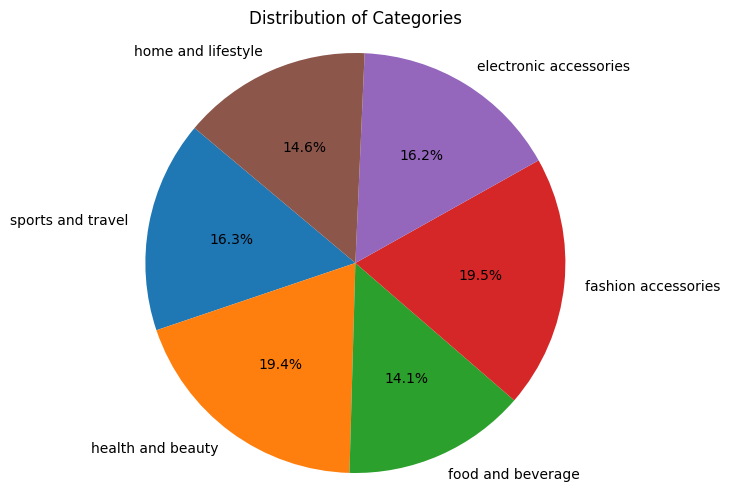

In [ ]:
#visualising the distribution of each category
plt.figure(figsize=(8, 6))
plt.pie(Cat_element_count.values(), labels=Cat_element_count.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
#what are the different lists of the randomly generated products per invoice
prod_type_list = df['Random Products'].apply(eval).tolist() #converting the random products df column into list of lists
prod_type_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Swimsuit', 'Eyeliner', 'Pasta', 'Burger', 'Salad', 'Towel', 'Hairpin'],
 ['Stand', 'Wallet', 'Earbuds', 'Mascara', 'Soup'],
 ['Sushi', 'Razor', 'Lotion', 'Modem', 'Orange', 'Map', 'Anklet'],
 ['Bracelet',
  'Wallet',
  'SleepingBag',
  'Razor',
  'Ring',
  'Eyeliner',
  'Bronzer',
  'Bed'],
 ['Clutch', 'Towel', 'Cake', 'Keyboard', 'Kayak', 'Chair', 'Concealer'],
 ['Shampoo', 'Backpack', 'Tie', 'Sneakers', 'Swimsuit', 'Router', 'Tent'],
 ['Sunscreen', 'Shelf', 'Hairpin', 'Belt', 'Router', 'Binoculars'],
 ['Gloves',
  'Powerbank',
  'SleepingBag',
  'Lipstick',
  'Mascara',
  'Pizza',
  'Wallet',
  'Earrings',
  'Orange',
  'Lotion'],
 ['Shelf', 'Binoculars'],
 ['Camera', 'Plant', 'Protector'],
 ['Sushi', 'Speaker', 'Router', 'Waterbottle'],
 ['Curtains', 'Bed', 'Necklace', 'Waterbottle'],
 ['Lipstick', 'Orange', 'Chair', 'SleepingBag', 'Conditioner'],
 ['Ring',
  'Salad',
  'Lotion',
  'Waterbottle',
  'Adapter',
  'Gloves',
  'Juice',
  'Blush',
  'Skis',
  'Clutch'],
 ['Water',
  '

In [ ]:
#flattening the entire random product list into sublist structure
flat_ProdType_list = [item for sublist in prod_type_list for item in sublist]

Prod_element_count = Counter(flat_ProdType_list)

#understanding the freq of occurence of each product
for key, value in Prod_element_count.items(): #printing the unique elements as key val pairs
    print(f"{key}: {value}")

Swimsuit: 52
Eyeliner: 49
Pasta: 55
Burger: 43
Salad: 67
Towel: 57
Hairpin: 51
Stand: 58
Wallet: 56
Earbuds: 47
Mascara: 53
Soup: 60
Sushi: 48
Razor: 58
Lotion: 67
Modem: 62
Orange: 53
Map: 37
Anklet: 44
Bracelet: 60
SleepingBag: 52
Ring: 56
Bronzer: 41
Bed: 59
Clutch: 60
Cake: 54
Keyboard: 57
Kayak: 54
Chair: 63
Concealer: 52
Shampoo: 57
Backpack: 54
Tie: 64
Sneakers: 47
Router: 66
Tent: 63
Sunscreen: 64
Shelf: 56
Belt: 49
Binoculars: 56
Gloves: 66
Powerbank: 51
Lipstick: 58
Pizza: 52
Earrings: 58
Camera: 54
Plant: 58
Protector: 59
Speaker: 75
Waterbottle: 52
Curtains: 52
Necklace: 52
Conditioner: 45
Adapter: 61
Juice: 42
Blush: 55
Skis: 67
Water: 52
Case: 60
Sofa: 51
Sunglasses: 52
Helmet: 57
Purse: 47
Cufflinks: 59
Deodorant: 60
Tea: 54
Blanket: 51
Balm: 55
Mouse: 53
Mirror: 57
Scarf: 47
Passport: 73
Apple: 46
Vase: 58
Banana: 46
Rug: 66
Coffee: 47
Tote: 62
Mask: 54
Moisturizer: 49
Goggles: 63
Lamp: 54
Primer: 39
Cable: 72
Suitcase: 60
Candle: 48
Hub: 51
Webcam: 59
Desk: 47
Charger:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


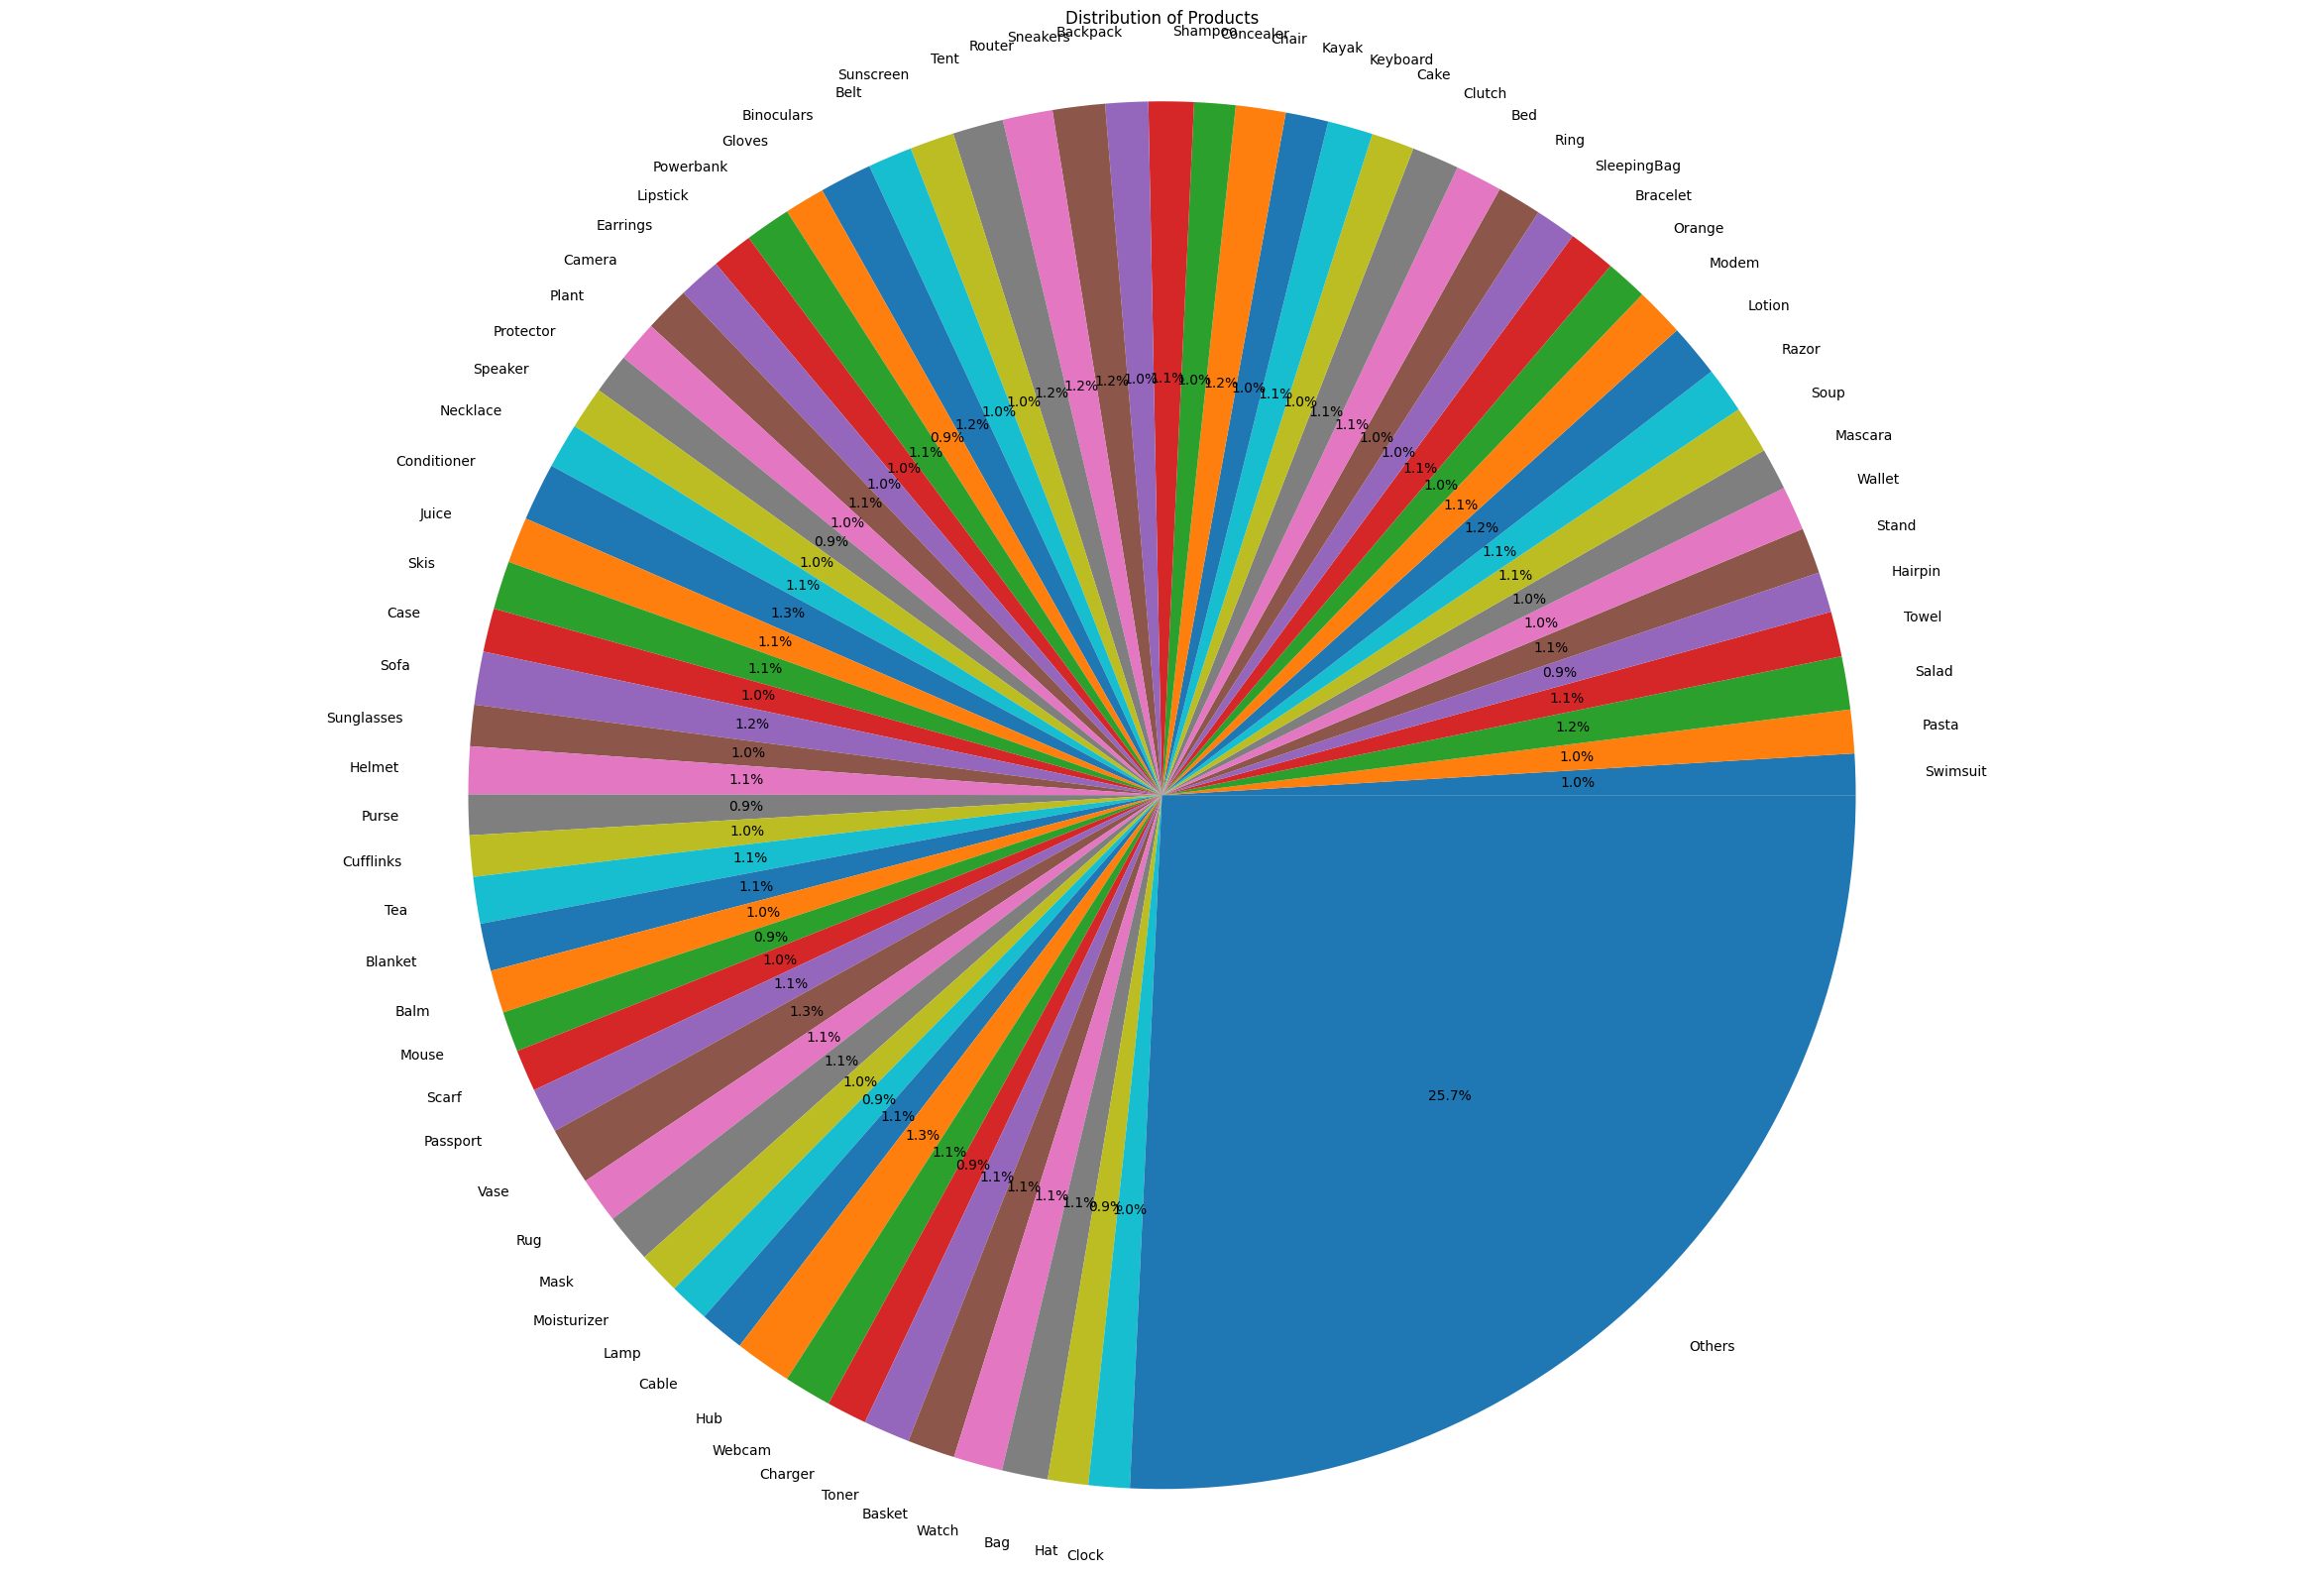

In [ ]:
#visualizing the distribution of random products
# Data
products = [
    'Swimsuit', 'Eyeliner', 'Pasta', 'Burger', 'Salad', 'Towel', 'Hairpin', 'Stand', 'Wallet', 'Earbuds',
    'Mascara', 'Soup', 'Sushi', 'Razor', 'Lotion', 'Modem', 'Orange', 'Map', 'Anklet', 'Bracelet',
    'SleepingBag', 'Ring', 'Bronzer', 'Bed', 'Clutch', 'Cake', 'Keyboard', 'Kayak', 'Chair', 'Concealer',
    'Shampoo', 'Backpack', 'Tie', 'Sneakers', 'Router', 'Tent', 'Sunscreen', 'Shelf', 'Belt', 'Binoculars',
    'Gloves', 'Powerbank', 'Lipstick', 'Pizza', 'Earrings', 'Camera', 'Plant', 'Protector', 'Speaker',
    'Waterbottle', 'Curtains', 'Necklace', 'Conditioner', 'Adapter', 'Juice', 'Blush', 'Skis', 'Water',
    'Case', 'Sofa', 'Sunglasses', 'Helmet', 'Purse', 'Cufflinks', 'Deodorant', 'Tea', 'Blanket', 'Balm',
    'Mouse', 'Mirror', 'Scarf', 'Passport', 'Apple', 'Vase', 'Banana', 'Rug', 'Coffee', 'Tote', 'Mask',
    'Moisturizer', 'Goggles', 'Lamp', 'Primer', 'Cable', 'Suitcase', 'Candle', 'Hub', 'Webcam', 'Desk',
    'Charger', 'Toner', 'Cookie', 'Basket', 'Watch', 'Bag', 'Brooch', 'Hat', 'Clock', 'Scrub', 'Cleanser',
    'Serum'
]

counts = [
    52, 49, 55, 43, 67, 57, 51, 58, 56, 47,
    53, 60, 48, 58, 67, 62, 53, 37, 44, 60,
    52, 56, 41, 59, 60, 54, 57, 54, 63, 52,
    57, 54, 47, 66, 63, 64, 56, 49, 56, 66,
    51, 58, 52, 46, 54, 58, 52, 51, 54, 47,
    46, 57, 73, 46, 58, 45, 61, 42, 55, 67,
    52, 60, 51, 52, 47, 59, 60, 54, 51, 46,
    53, 57, 47, 73, 46, 58, 46, 47, 62, 54,
    41, 51, 41, 57, 46, 46, 72, 60, 48, 51,
    59, 47, 60, 62, 58, 43, 51, 52, 46, 41,
    41, 57, 46, 46
]

# Threshold for labels
threshold = 50

# Filter prod and counts based on threshold
filtered_prod = []
filtered_counts = []
others_count = 0

for prod, count in zip(products, counts):
    if count >= threshold:
        filtered_prod.append(prod)
        filtered_counts.append(count)
    else:
        others_count += count

# Add 'Others' prod
filtered_prod.append('Others')
filtered_counts.append(others_count)

# Plot pie chart
plt.figure(figsize=(30, 20))
plt.pie(filtered_counts, labels=filtered_prod, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Products')
plt.show()


In [ ]:
#payment method
payment_frequency = df['Payment'].value_counts()
print(payment_frequency)

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#number of invoices recorded per month
df['Date'] = pd.to_datetime(df['Date'])

# Extract month from 'InvoiceDate' column
df['Month'] = df['Date'].dt.month

# Group by month and count number of invoices
invoices_per_month = df.groupby('Month').size()

print(invoices_per_month)

Month
1    352
2    303
3    345
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-290-0fef5c247b45>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
#number of invoices recorded per day
#number of invoices recorded per month
df['Date'] = pd.to_datetime(df['Date'])

df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

# Group by both day and month and count number of invoices
invoices_per_day_of_month = df.groupby(['Month', 'Day']).size().reset_index(name='Number_of_Invoices')

print(invoices_per_day_of_month) #difficult to see and visualise (work on it)

    Month  Day  Number_of_Invoices
0       1    1                  12
1       1    2                   8
2       1    3                   8
3       1    4                   6
4       1    5                  12
..    ...  ...                 ...
84      3   26                  13
85      3   27                  10
86      3   28                  10
87      3   29                   8
88      3   30                  11

[89 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Calc the number of invoices recorded per day for a specific month
def invoices_per_day_of_month(df, month):

    # Convert 'InvoiceDate' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Extract day and month from 'InvoiceDate' column
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month

    # Filter DataFrame for the specified month
    df_month = df[df['Date'].dt.month == month]

    # Group by both day and month and count number of invoices
    invoices_per_day = df_month.groupby(['Month', 'Day']).size().reset_index(name='Number_of_Invoices')

    return invoices_per_day

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


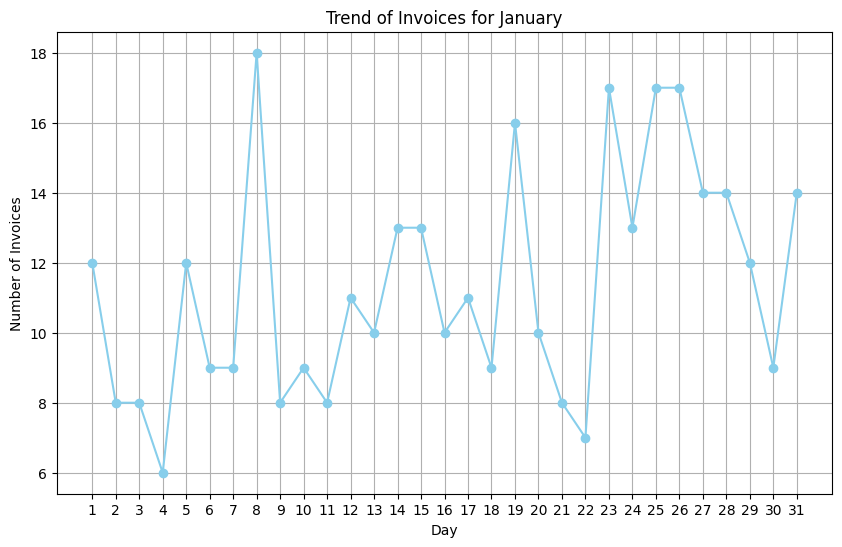

In [ ]:
invoices_january = invoices_per_day_of_month(df, month=1)
# print("Invoices for January:")
# print(invoices_january)
# Plot trend for January
plt.figure(figsize=(10, 6))
plt.plot(invoices_january['Day'], invoices_january['Number_of_Invoices'], marker='o', color='skyblue', linestyle='-')
plt.title('Trend of Invoices for January')
plt.xlabel('Day')
plt.ylabel('Number of Invoices')
plt.grid(True)
plt.xticks(range(1, max(invoices_january['Day']) + 1))  # Assuming all days of the month are present
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


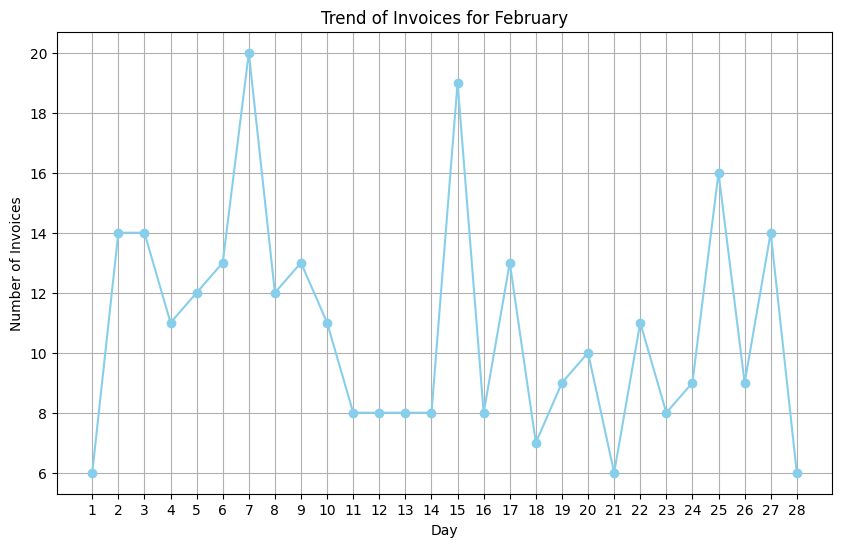

In [ ]:
#number of invoices per day for the month of february
invoices_february = invoices_per_day_of_month(df, month=2)
# print("Invoices for Feb:")
# print(invoices_Feb)
# Plot trend for Febrary
plt.figure(figsize=(10, 6))
plt.plot(invoices_february['Day'], invoices_february['Number_of_Invoices'], marker='o', color='skyblue', linestyle='-')
plt.title('Trend of Invoices for February')
plt.xlabel('Day')
plt.ylabel('Number of Invoices')
plt.grid(True)
plt.xticks(range(1, max(invoices_february['Day']) + 1))  # Assuming all days of the month are present
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


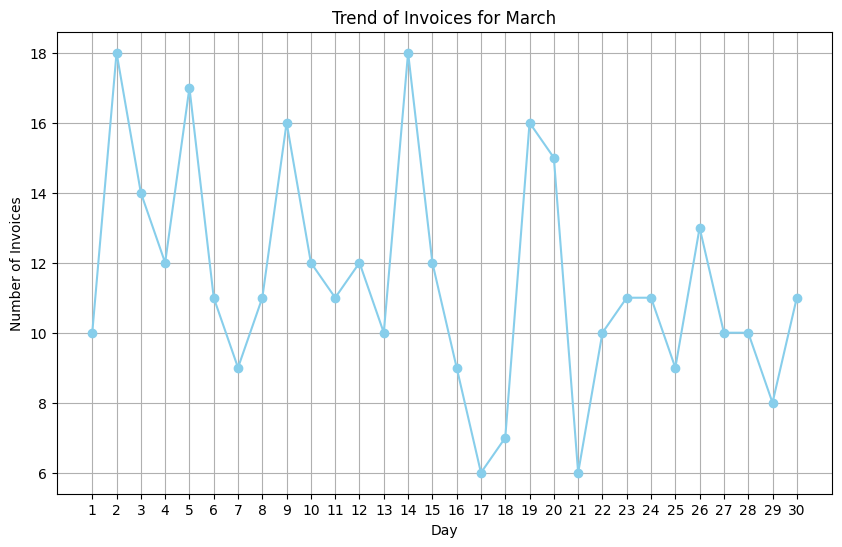

In [ ]:
#number of invoices per day for the month of March
invoices_march = invoices_per_day_of_month(df, month=3)
# print("Invoices for March:")
# print(invoices_march)
# Plot trend for March
plt.figure(figsize=(10, 6))
plt.plot(invoices_march['Day'], invoices_march['Number_of_Invoices'], marker='o', color='skyblue', linestyle='-')
plt.title('Trend of Invoices for March')
plt.xlabel('Day')
plt.ylabel('Number of Invoices')
plt.grid(True)
plt.xticks(range(1, max(invoices_march['Day']) + 1))  # Assuming all days of the month are present
plt.show()

In [ ]:
# Calculate average rating for each branch
avg_rating_per_branch = df.groupby('Branch')['Rating'].mean()
print("Mean Rating per Branch: ")
print(avg_rating_per_branch)

Mean Rating per Branch: 
Branch
A    7.027059
B    6.818072
C    7.072866
Name: Rating, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate minimum rating for each branch
min_rating_per_branch = df.groupby('Branch')['Rating'].min()
print("Minimum Rating per Branch:")
print(min_rating_per_branch)


Minimum Rating per Branch:
Branch
A    4.0
B    4.0
C    4.0
Name: Rating, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate maximum rating for each branch
max_rating_per_branch = df.groupby('Branch')['Rating'].max()
print("Maximum Rating per Branch:")
print(max_rating_per_branch)

Maximum Rating per Branch:
Branch
A    10.0
B    10.0
C    10.0
Name: Rating, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Customer Segmentation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


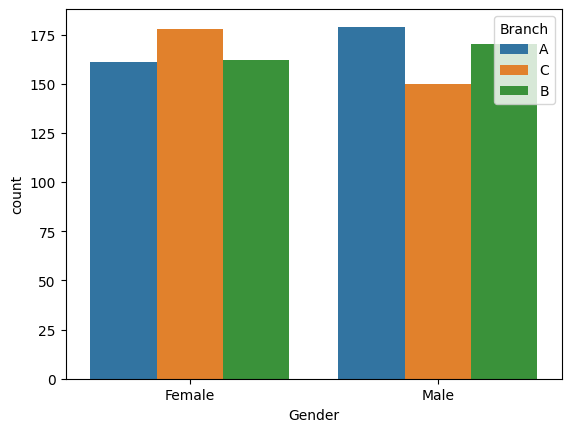

In [ ]:
#visualization of how gender vs branch
sns.countplot(x="Gender", hue="Branch", data=df);

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


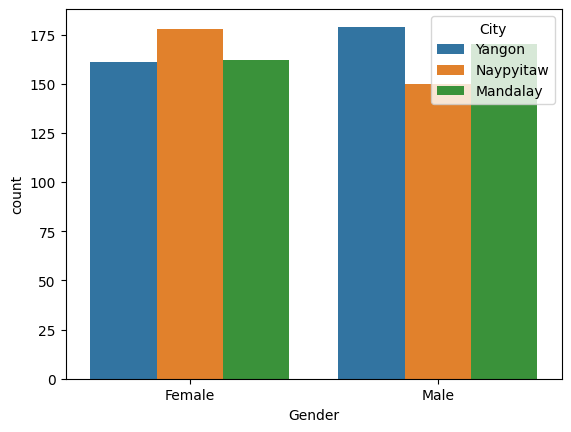

In [ ]:
#visualization of how gender vs city
sns.countplot(x="Gender", hue="City", data=df);

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Gender', ylabel='count'>

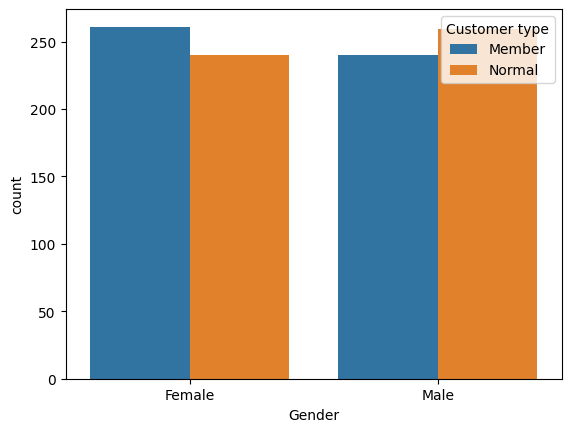

In [ ]:
#visualization of how gender vs Customer type
sns.countplot(x="Gender", hue="Customer type", data=df)

In [ ]:
#function to understand how Gender influnces choice of Categories
def count_gen_Categories(df, gender):
    # Filter rows with specified gender and explode the Categories column
    prod_cat_list = df[df['Gender'] == gender]['Categories'].apply(eval).tolist()
    flat_prod_cat_list = [item for sublist in prod_cat_list for item in sublist]

    # Count occurrences of elements
    prod_cat_count = Counter(flat_prod_cat_list)

    return prod_cat_count

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#understanding the data when Gender = Female
#what is the frequency of occurence of each category
female_Cat_count = count_gen_Categories(df, 'Female')
for key, value in female_Cat_count.items():
    print(f"{key}: {value}")

sports and travel: 464
health and beauty: 539
food and beverage: 402
fashion accessories: 545
electronic accessories: 481
home and lifestyle: 438


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


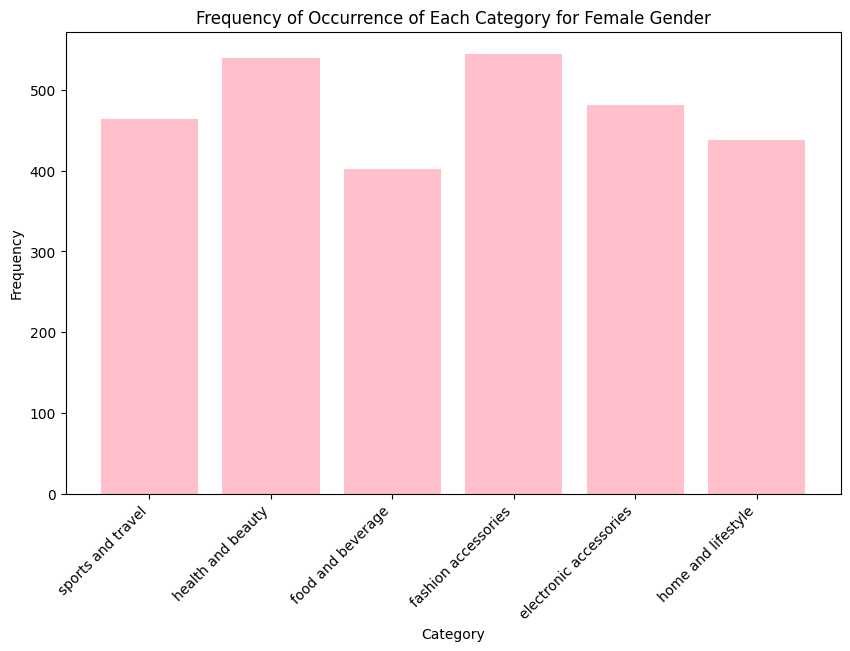

In [ ]:
# Plotting Female vs Category
plt.figure(figsize=(10, 6))
plt.bar(female_Cat_count.keys(), female_Cat_count.values(), color='pink')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Occurrence of Each Category for Female Gender')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
#understanding the data when Gender = Male
#what is the frequency of occurence of each category
Male_Cat_count = count_gen_Categories(df, 'Male')
for key, value in Male_Cat_count.items():
    print(f"{key}: {value}")

food and beverage: 375
health and beauty: 528
electronic accessories: 410
sports and travel: 434
fashion accessories: 528
home and lifestyle: 366


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


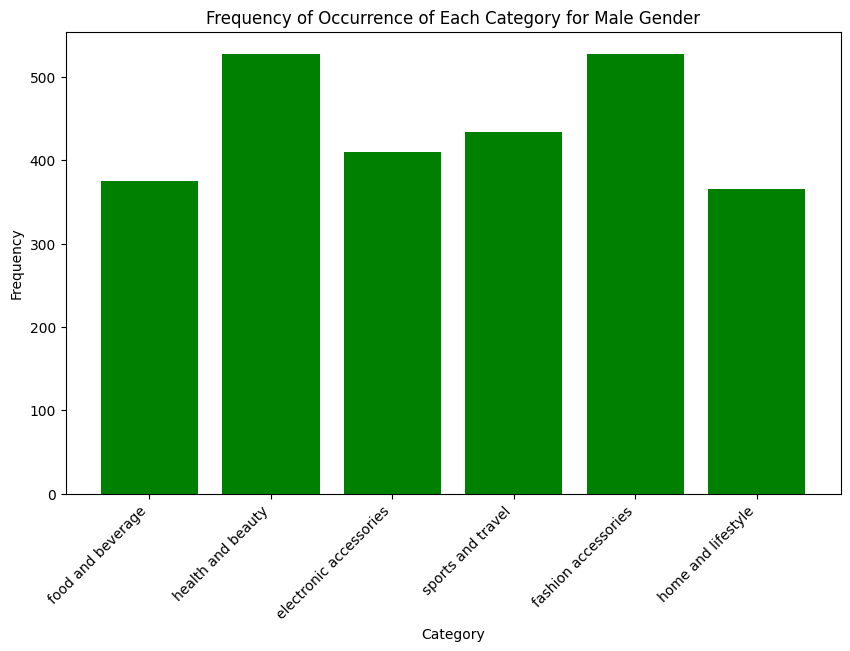

In [ ]:
# Plotting Male vs Category
plt.figure(figsize=(10, 6))
plt.bar(Male_Cat_count.keys(), Male_Cat_count.values(), color='green')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of Occurrence of Each Category for Male Gender')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
#function to understand how Gender influences choice of Random Products
def count_gen_RandomProducts(df, gender, threshold):
    # Filter rows with specified gender and explode the Categories column
    prod_list = df[df['Gender'] == gender]['Random Products'].apply(eval).tolist()
    flat_prod_list = [item for sublist in prod_list for item in sublist]

    # Count occurrences of elements
    prod_count = Counter(flat_prod_list)

    #utilising a threshold because the list of all the items is difficult to traverse and analyze
    prod_count_filtered = {key: value for key, value in prod_count.items() if value >= threshold}

    #without using a threshold
    #return prod_count

    return prod_count_filtered

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
female_prod_count = count_gen_RandomProducts(df, 'Female', 35) #identifying only items which have total freq>35
# for key, value in female_prod_count.items():
#     print(f"{key}: {value}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


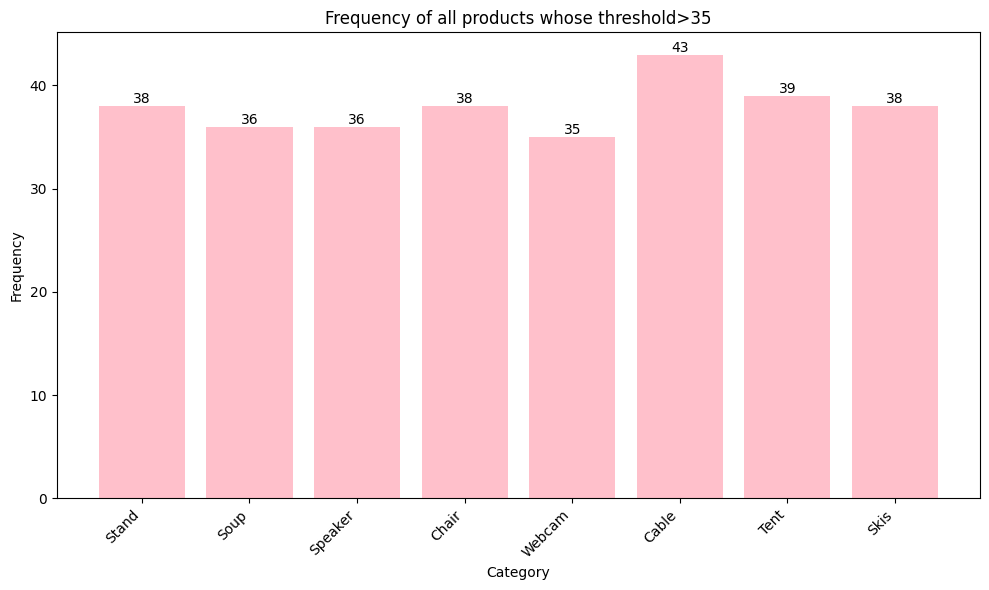

In [ ]:
# Plotting Female vs Products
plt.figure(figsize=(10, 6))
bars = plt.bar(female_prod_count.keys(), female_prod_count.values(), color='pink')

# Add text annotations to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of all products whose threshold>35')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
male_prod_count = count_gen_RandomProducts(df, 'Male', 35) #identifying only items which have total freq>35
# for key, value in male_prod_count.items():
#     print(f"{key}: {value}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


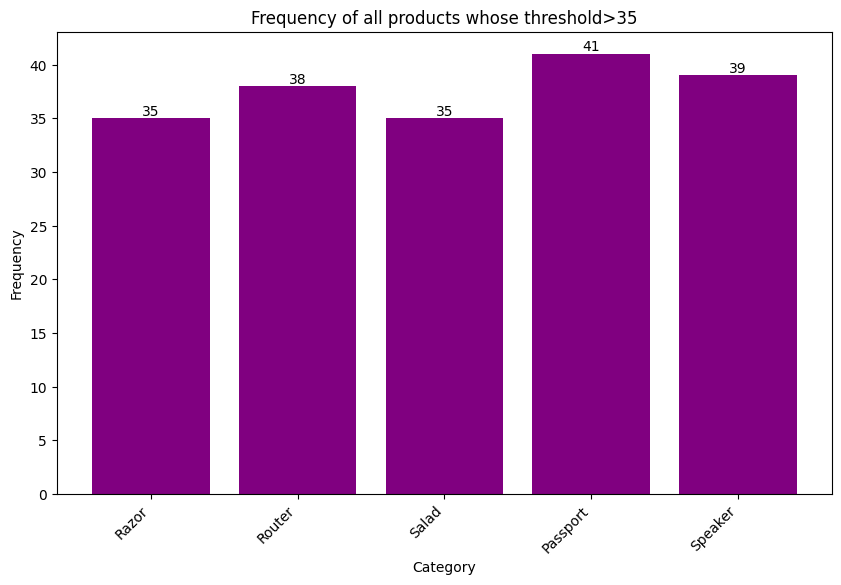

In [ ]:
# Plotting Male vs Products
plt.figure(figsize=(10, 6))
bars = plt.bar(male_prod_count.keys(), male_prod_count.values(), color='purple')

# Add text annotations to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of all products whose threshold>35')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
#function to understand which categories are popular in which branch
def count_branch_Categories(df, branch):
    # Filter rows with specified gender and explode the Categories column
    cat_list = df[df['Branch'] == branch]['Categories'].apply(eval).tolist()
    flat_cat_list = [item for sublist in cat_list for item in sublist]

    # Count occurrences of elements
    cat_count = Counter(flat_cat_list)

    return cat_count

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
branchA_cat_count = count_branch_Categories(df, 'A') #identifying only items which have total freq>35
# for key, value in branchA_cat_count.items():
#     print(f"{key}: {value}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


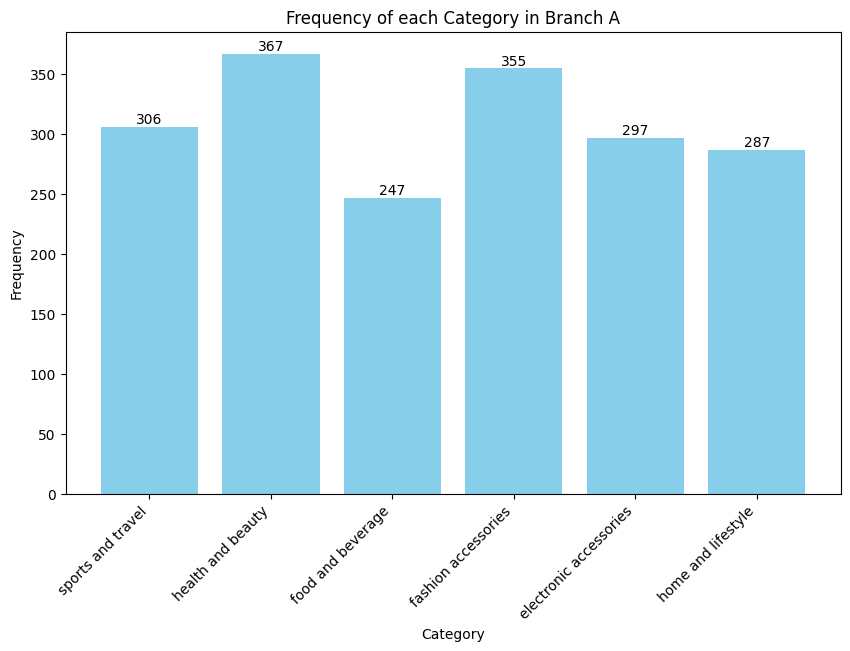

In [ ]:
# Plotting graph for branch A vs category
plt.figure(figsize=(10, 6))
bars = plt.bar(branchA_cat_count.keys(), branchA_cat_count.values(), color='skyblue')

# Add text annotations to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of each Category in Branch A')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
branchB_cat_count = count_branch_Categories(df, 'B') #identifying only items which have total freq>35
# for key, value in branchB_cat_count.items():
#     print(f"{key}: {value}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


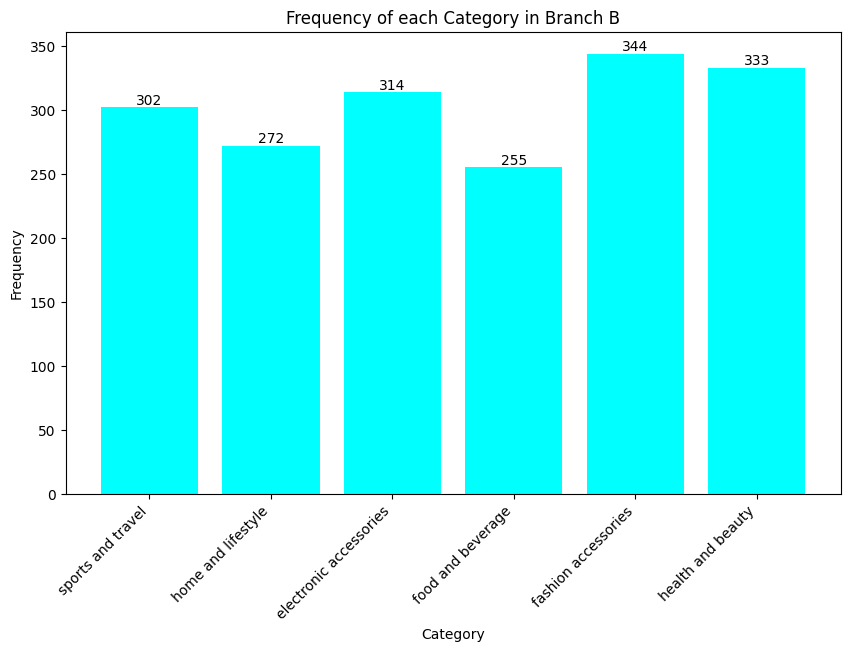

In [ ]:
# Plotting graph for branch B vs category
plt.figure(figsize=(10, 6))
bars = plt.bar(branchB_cat_count.keys(), branchB_cat_count.values(), color='cyan')

# Add text annotations to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of each Category in Branch B')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
branchC_cat_count = count_branch_Categories(df, 'C') #identifying only items which have total freq>35
# for key, value in branchC_cat_count.items():
#     print(f"{key}: {value}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


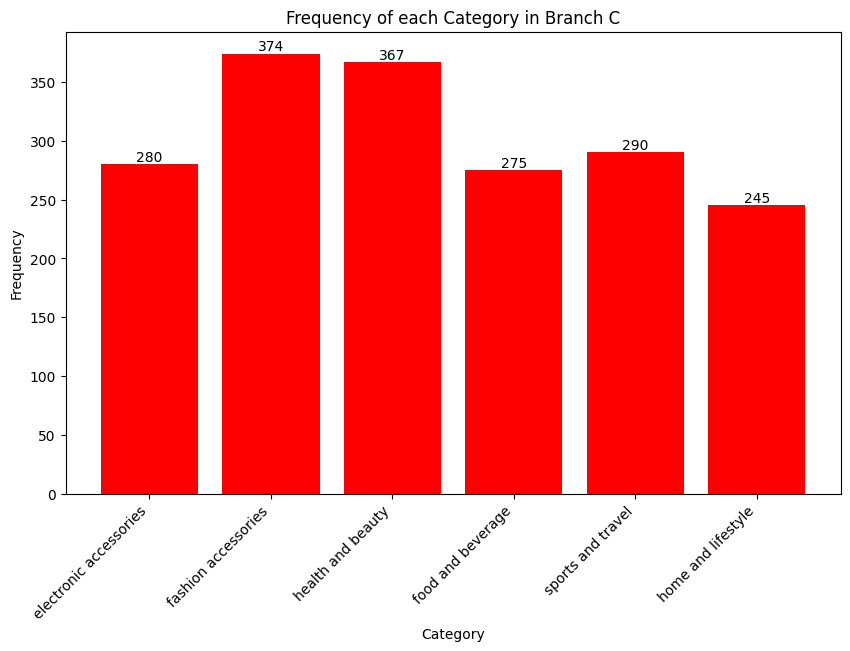

In [ ]:
# Plotting graph for branch C vs category
plt.figure(figsize=(10, 6))
bars = plt.bar(branchC_cat_count.keys(), branchC_cat_count.values(), color='red')

# Add text annotations to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency of each Category in Branch C')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Apriori

In [ ]:
# Convert the "Random products" column to a list of lists
transactions = df['Random Products'].apply(eval).tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
transactions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Swimsuit', 'Eyeliner', 'Pasta', 'Burger', 'Salad', 'Towel', 'Hairpin'],
 ['Stand', 'Wallet', 'Earbuds', 'Mascara', 'Soup'],
 ['Sushi', 'Razor', 'Lotion', 'Modem', 'Orange', 'Map', 'Anklet'],
 ['Bracelet',
  'Wallet',
  'SleepingBag',
  'Razor',
  'Ring',
  'Eyeliner',
  'Bronzer',
  'Bed'],
 ['Clutch', 'Towel', 'Cake', 'Keyboard', 'Kayak', 'Chair', 'Concealer'],
 ['Shampoo', 'Backpack', 'Tie', 'Sneakers', 'Swimsuit', 'Router', 'Tent'],
 ['Sunscreen', 'Shelf', 'Hairpin', 'Belt', 'Router', 'Binoculars'],
 ['Gloves',
  'Powerbank',
  'SleepingBag',
  'Lipstick',
  'Mascara',
  'Pizza',
  'Wallet',
  'Earrings',
  'Orange',
  'Lotion'],
 ['Shelf', 'Binoculars'],
 ['Camera', 'Plant', 'Protector'],
 ['Sushi', 'Speaker', 'Router', 'Waterbottle'],
 ['Curtains', 'Bed', 'Necklace', 'Waterbottle'],
 ['Lipstick', 'Orange', 'Chair', 'SleepingBag', 'Conditioner'],
 ['Ring',
  'Salad',
  'Lotion',
  'Waterbottle',
  'Adapter',
  'Gloves',
  'Juice',
  'Blush',
  'Skis',
  'Clutch'],
 ['Water',
  '

In [ ]:
# Initialize transaction encoder
encoder = TransactionEncoder()

# Fit and Transform the data
te = encoder.fit(transactions).transform(transactions)
te

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ..., False, False, False]])

In [ ]:
#Create a dataframe from transactions columns
itemsets = pd.DataFrame(te, columns=encoder.columns_)
itemsets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Adapter,Anklet,Apple,Backpack,Bag,Balm,Banana,Basket,Bed,Belt,...,Tie,Toner,Tote,Towel,Vase,Wallet,Watch,Water,Waterbottle,Webcam
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
n_rows, n_items = itemsets.shape #dimensions of the dataframe

print(f"No. of Unique Invoices  : {n_rows}")
print(f"No. of Products : {n_items}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


No. of Unique Invoices  : 1000
No. of Products : 101


In [ ]:
# Computing the minimum support threshold
minimum_support_threshold = 0.004

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Applying the algorithm
freq_itemsets = apriori(itemsets, minimum_support_threshold, use_colnames=True) #itemset derived from  encoder
#use colnames-> signify that the apriori will use the column names from original dataset instead of using integer index

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
freq_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.061,(Adapter)
1,0.044,(Anklet)
2,0.046,(Apple)
3,0.054,(Backpack)
4,0.052,(Bag)
...,...,...
2224,0.004,"(Skis, Lotion, Salad)"
2225,0.004,"(Passport, Skis, Speaker)"
2226,0.004,"(Plant, Webcam, Vase)"
2227,0.004,"(Protector, Webcam, Vase)"


In [ ]:
# # Extracting top 5 supports for item sets of length 1
# top_5_supports = freq_itemsets[freq_itemsets.itemsets.map(len) == 1].nlargest(5, 'support')

# # Printing the results
# for index, row in top_5_supports.iterrows():
#     item_name = list(row['itemsets'])[0].title()
#     support_value = row['support']

#     print(f"{item_name:20}: {support_value}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Sorted the values in ascending order based on their support
freq_itemsets.sort_values('support', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
82,0.075,(Speaker)
59,0.073,(Passport)
17,0.072,(Cable)
77,0.067,(Skis)
49,0.067,(Lotion)
...,...,...
1501,0.004,"(Kayak, Sushi)"
1502,0.004,"(Swimsuit, Kayak)"
1503,0.004,"(Kayak, Tent)"
669,0.004,"(Burger, Powerbank)"


In [ ]:
# Computing lengths and creating a logical filter
lengths = [len(itemset) for itemset in freq_itemsets.itemsets]
freq_itemsets[[val>=2 for val in lengths]] #examining items sets are have 2 or more products in them

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
101,0.007,"(Adapter, Bag)"
102,0.005,"(Adapter, Bed)"
103,0.004,"(Adapter, Belt)"
104,0.004,"(Binoculars, Adapter)"
105,0.004,"(Blanket, Adapter)"
...,...,...
2224,0.004,"(Skis, Lotion, Salad)"
2225,0.004,"(Passport, Skis, Speaker)"
2226,0.004,"(Plant, Webcam, Vase)"
2227,0.004,"(Protector, Webcam, Vase)"


In [ ]:
#Description of dataset
freq_itemsets.groupby(lengths)['support'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,mean,std,min,25%,50%,75%,max
1,101.0,0.054554,0.007550,0.037,0.049,0.054,0.059,0.075
2,2113.0,0.005061,0.001265,0.004,0.004,0.005,0.006,0.012
3,15.0,0.004067,0.000258,0.004,0.004,0.004,0.004,0.005


In [ ]:
# Creating assocation rules for confidence having minimum threshold of 0.20
rules = association_rules(freq_itemsets, metric='confidence', min_threshold=0.20)[['antecedents','consequents','support','confidence','lift']]
#min_threshold is figured out from hit and trial method

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
0,(Bronzer),(Toner),0.009,0.219512,3.540519
1,(Camera),(Plant),0.011,0.203704,3.512133
2,(Clock),(Keyboard),0.010,0.243902,4.278990
3,(Keyboard),(Passport),0.012,0.210526,2.883922
4,(Pizza),(Lotion),0.011,0.211538,3.157290
5,(Wallet),(Lotion),0.012,0.214286,3.198294
6,"(Cookie, Adapter)",(Waterbottle),0.004,0.571429,10.989011
7,"(Cookie, Waterbottle)",(Adapter),0.004,0.571429,9.367681
8,"(Adapter, Waterbottle)",(Cookie),0.004,0.500000,8.620690
9,"(Burger, Orange)",(Sushi),0.004,0.800000,16.666667


In [ ]:
print(f'Total Number of Association Rules: {rules.shape[0]}')

Total Number of Association Rules: 51


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules.sort_values('confidence', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
43,"(Plant, Vase)",(Webcam),0.004,1.000000,16.949153
10,"(Burger, Sushi)",(Orange),0.004,1.000000,18.867925
30,"(Pizza, Powerbank)",(Lotion),0.005,0.833333,12.437811
9,"(Burger, Orange)",(Sushi),0.004,0.800000,16.666667
11,"(Orange, Sushi)",(Burger),0.004,0.800000,18.604651
24,"(Hairpin, Modem)",(Speaker),0.004,0.800000,10.666667
18,"(Passport, Clock)",(Keyboard),0.004,0.800000,14.035088
45,"(Protector, Webcam)",(Vase),0.004,0.800000,13.793103
49,"(Scarf, Speaker)",(Skis),0.004,0.666667,9.950249
33,"(Wallet, Pizza)",(Lotion),0.004,0.666667,9.950249


In [ ]:
# Creating an empty list to store individual DataFrames
dfs = []

# Iterating through each association rule and creating a DataFrame for each row
for i, row in rules.iterrows():
    antecedents = ', '.join(row['antecedents'])
    consequents = ', '.join(row['consequents'])
    support = row['support']
    confidence = row['confidence']
    lift = row['lift']

    # Creating a DataFrame for the current row
    df_row = pd.DataFrame([[antecedents, consequents, support, confidence, lift]], columns=['Antecedents', 'Consequents', 'Support', 'Confidence', 'Lift'])

    # Appending the DataFrame to the list
    dfs.append(df_row)

# Concatenating all individual DataFrames into one
rules_df = pd.concat(dfs, ignore_index=True)

# Displaying the DataFrame
print(rules_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


             Antecedents  Consequents  Support  Confidence       Lift
0                Bronzer        Toner    0.009    0.219512   3.540519
1                 Camera        Plant    0.011    0.203704   3.512133
2                  Clock     Keyboard    0.010    0.243902   4.278990
3               Keyboard     Passport    0.012    0.210526   2.883922
4                  Pizza       Lotion    0.011    0.211538   3.157290
5                 Wallet       Lotion    0.012    0.214286   3.198294
6        Cookie, Adapter  Waterbottle    0.004    0.571429  10.989011
7    Cookie, Waterbottle      Adapter    0.004    0.571429   9.367681
8   Adapter, Waterbottle       Cookie    0.004    0.500000   8.620690
9         Burger, Orange        Sushi    0.004    0.800000  16.666667
10         Burger, Sushi       Orange    0.004    1.000000  18.867925
11         Orange, Sushi       Burger    0.004    0.800000  18.604651
12      Suitcase, Webcam        Chair    0.004    0.571429   9.070295
13       Suitcase, C

In [ ]:
rules_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Antecedents,Consequents,Support,Confidence,Lift
0,Bronzer,Toner,0.009,0.219512,3.540519
1,Camera,Plant,0.011,0.203704,3.512133
2,Clock,Keyboard,0.010,0.243902,4.278990
3,Keyboard,Passport,0.012,0.210526,2.883922
4,Pizza,Lotion,0.011,0.211538,3.157290
5,Wallet,Lotion,0.012,0.214286,3.198294
6,"Cookie, Adapter",Waterbottle,0.004,0.571429,10.989011
7,"Cookie, Waterbottle",Adapter,0.004,0.571429,9.367681
8,"Adapter, Waterbottle",Cookie,0.004,0.500000,8.620690
9,"Burger, Orange",Sushi,0.004,0.800000,16.666667


**For items selected by male population**

In [ ]:
def generate_rules_by_gender(df, gender):
    # Filter the DataFrame to include only rows where the Gender matches the specified gender
    gender_transactions = df[df['Gender'] == gender]['Random Products']

    # Apply eval function to convert the strings to Python lists and then convert to a list of lists
    transactions = gender_transactions.apply(eval).tolist()

    # Initialize transaction encoder
    encoder = TransactionEncoder()

    # Fit and Transform the data
    te = encoder.fit(transactions).transform(transactions)

    # Computing the minimum support threshold
    minimum_support_threshold = 0.004

    # Create a dataframe from transactions columns
    itemsets = pd.DataFrame(te, columns=encoder.columns_)

    # Applying the algorithm
    freq_itemsets = apriori(itemsets, minimum_support_threshold, use_colnames=True)

    # Creating association rules for confidence having minimum threshold of 0.50
    rules = association_rules(freq_itemsets, metric='confidence', min_threshold=0.50)[['antecedents','consequents','support','confidence','lift']]

    return rules


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules_male = generate_rules_by_gender(df, 'Male')
rules_male[(rules_male['lift'] > 200) ].sort_values('lift', ascending=False).head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
1700,"(Basket, Balm)","(Protector, SleepingBag)",0.004008,1.0,249.5
1701,"(Protector, SleepingBag)","(Basket, Balm)",0.004008,1.0,249.5
2214,"(Watch, Scrub, Speaker)","(Hub, Scarf)",0.004008,1.0,249.5
2208,"(Ring, Sushi)","(Clutch, Mascara, Vase)",0.004008,1.0,249.5
2207,"(Mascara, Ring)","(Clutch, Vase, Sushi)",0.004008,1.0,249.5


**For items selected by female population**

In [ ]:
rules_female = generate_rules_by_gender(df, 'Female')
rules_female[(rules_female['lift'] > 10) ].sort_values('lift', ascending=False).head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
35,"(Burger, Orange)",(Sushi),0.005988,1.0,23.857143
5,"(Bed, Orange)",(Anklet),0.005988,1.0,20.875000
34,"(Webcam, Toner)",(Bronzer),0.005988,0.6,18.787500
37,"(Orange, Sushi)",(Burger),0.005988,1.0,18.555556
36,"(Burger, Sushi)",(Orange),0.005988,1.0,17.275862


**For items selected by branch A**

In [ ]:
def generateTransaction(df, branch):
    # Filter the DataFrame to include only rows where the Branch matches the specified branch
    branch_transactions = df[df['Branch'] == branch]['Random Products']

    # Apply eval function to convert the strings to Python lists and then convert to a list of lists
    transactions = branch_transactions.apply(eval).tolist()

    # Initialize transaction encoder
    encoder = TransactionEncoder()

    # Fit and Transform the data
    te = encoder.fit(transactions).transform(transactions)

    # Computing the minimum support threshold
    minimum_support_threshold = 0.004

    # Create a dataframe from transactions columns
    itemsets = pd.DataFrame(te, columns=encoder.columns_)

    # Applying the algorithm
    freq_itemsets = apriori(itemsets, minimum_support_threshold, use_colnames=True)

    # Creating association rules for confidence having minimum threshold of 0.50
    rules = association_rules(freq_itemsets, metric='confidence', min_threshold=0.50)[['antecedents','consequents','support','confidence','lift']]

    return rules


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules_A = generateTransaction(df, 'A')
rules_A[(rules_A['lift'] > 150) ].sort_values('lift', ascending=False).head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
1010,"(Binoculars, Adapter)","(Water, Bag)",0.005882,1.0,170.0
1015,"(Water, Bag)","(Binoculars, Adapter)",0.005882,1.0,170.0
1300,"(Tie, Case)","(Swimsuit, Water, Sunglasses)",0.005882,1.0,170.0
1299,"(Swimsuit, Sunglasses)","(Tie, Water, Case)",0.005882,1.0,170.0
1298,"(Swimsuit, Water)","(Tie, Sunglasses, Case)",0.005882,1.0,170.0


**For items selected by branch B**

In [ ]:
rules_B = generateTransaction(df, 'B')
rules_B[(rules_B['lift'] > 150) ].sort_values('lift', ascending=False).head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
1130,"(Apple, Brooch)","(Concealer, Shampoo)",0.006024,1.0,166.0
1534,"(Orange, Sushi)","(Burger, Sofa, Conditioner)",0.006024,1.0,166.0
1406,"(Sofa, Sushi)","(Orange, Conditioner)",0.006024,1.0,166.0
1485,"(Juice, Lotion)","(Waterbottle, Ring)",0.006024,1.0,166.0
1488,"(Waterbottle, Ring)","(Juice, Lotion)",0.006024,1.0,166.0


**For items selected by branch C**

In [ ]:
rules_C = generateTransaction(df, 'C')
rules_C[(rules_C['lift'] > 150) ].sort_values('lift', ascending=False).head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
1034,"(Charger, Apple)","(Modem, Lotion)",0.006098,1.0,164.0
1036,"(Charger, Lotion)","(Apple, Modem)",0.006098,1.0,164.0
1316,"(Watch, Scarf)","(Hub, Scrub, Speaker)",0.006098,1.0,164.0
1310,"(Hub, Scrub, Speaker)","(Watch, Scarf)",0.006098,1.0,164.0
1304,"(Watch, Scrub, Speaker)","(Hub, Scarf)",0.006098,1.0,164.0


**For items selected by Normal Customer type**

In [ ]:
def generate_rules_by_customer_type(df, customer_type):
    # Filter the DataFrame to include only rows where the Customer type matches the specified customer_type
    customer_transactions = df[df['Customer type'] == customer_type]['Random Products']

    # Apply eval function to convert the strings to Python lists and then convert to a list of lists
    transactions = customer_transactions.apply(eval).tolist()

    # Initialize transaction encoder
    encoder = TransactionEncoder()

    # Fit and Transform the data
    te = encoder.fit(transactions).transform(transactions)

    # Computing the minimum support threshold
    minimum_support_threshold = 0.004

    # Create a dataframe from transactions columns
    itemsets = pd.DataFrame(te, columns=encoder.columns_)

    # Applying the algorithm
    freq_itemsets = apriori(itemsets, minimum_support_threshold, use_colnames=True)

    # Creating association rules for confidence having minimum threshold of 0.50
    rules = association_rules(freq_itemsets, metric='confidence', min_threshold=0.50)[['antecedents','consequents','support','confidence','lift']]

    return rules


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules_normal = generate_rules_by_customer_type(df,'Normal')
rules_normal[(rules_normal['lift'] > 150) ].sort_values('lift', ascending=False).head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
2590,"(Burger, Conditioner)","(Orange, Sofa, Sushi)",0.004008,1.0,249.5
2407,"(Concealer, Sunglasses)","(Speaker, Conditioner)",0.004008,1.0,249.5
2411,"(Speaker, Conditioner)","(Concealer, Sunglasses)",0.004008,1.0,249.5
2426,"(Cookie, Razor)","(Scrub, Desk)",0.004008,1.0,249.5
2429,"(Scrub, Desk)","(Cookie, Razor)",0.004008,1.0,249.5


**For items selected by Member Customer type**

In [ ]:
rules_member = generate_rules_by_customer_type(df,'Member')
rules_member[(rules_member['lift'] > 10) ].sort_values('lift', ascending=False).head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
19,"(Cable, Moisturizer)",(Hub),0.005988,1.0,20.875000
85,"(Sushi, Soup)",(Vase),0.005988,1.0,19.269231
17,"(Hub, Cable)",(Moisturizer),0.005988,1.0,18.555556
40,"(Cookie, Tie)",(Hat),0.005988,0.6,17.682353
46,"(Hairpin, Vase)",(Scrub),0.005988,1.0,17.275862


# Sales Prediction

In [ ]:
# !pip install prophet

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Selecting specific columns 'Date' and 'Total_Price' from the DataFrame 'df'
frame = df[['Date','Total_Price']]

# Renaming the columns to 'ds' for dates and 'y' for values, as required by Prophet
frame.columns = ['ds', 'y']

# Displaying the first 5 rows of the DataFrame 'frame'
frame.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ds,y
0,2019-01-05,10185.93
1,2019-03-08,4851.83
2,2019-03-03,8846.02
3,2019-01-27,10628.46
4,2019-02-08,9104.18


In [ ]:
# Create a Prophet model instance with a specified confidence interval width of 95%
m = Prophet(interval_width=0.95)

# Fit the Prophet model to the provided DataFrame containing time series data
training_run = m.fit(frame)

'''The first comment explains that a Prophet model instance m is created with an interval width of 95%,
which means that prediction intervals will be generated with a confidence level of 95%.
The second comment describes that the created Prophet model m is fitted (trained) using the data contained in the DataFrame frame.
This fitting process involves learning patterns and trends from historical time series data to make forecasts.'''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfszp6m7x/tyfknzrf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfszp6m7x/nrt9zlhk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2682', 'data', 'file=/tmp/tmpfszp6m7x/tyfknzrf.json', 'init=/tmp/tmpfszp6m7x/nrt9zlhk.json', 'output', 'file=/tmp/tmp

'The first comment explains that a Prophet model instance m is created with an interval width of 95%,\nwhich means that prediction intervals will be generated with a confidence level of 95%.\nThe second comment describes that the created Prophet model m is fitted (trained) using the data contained in the DataFrame frame.\nThis fitting process involves learning patterns and trends from historical time series data to make forecasts.'

In [ ]:
future = m.make_future_dataframe(periods=400, freq='D')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
forecast = m.predict(future)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
forecast[['ds','yhat_lower','yhat_upper','yhat']].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ds,yhat_lower,yhat_upper,yhat
0,2019-01-01,-172.313816,14556.357163,7193.343498
1,2019-01-02,-478.421294,14320.749610,7206.751172
2,2019-01-03,-664.956406,15106.011768,7177.597681
3,2019-01-04,-630.444121,15194.973242,7132.758676
4,2019-01-05,-341.337829,15072.504447,7375.670090


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


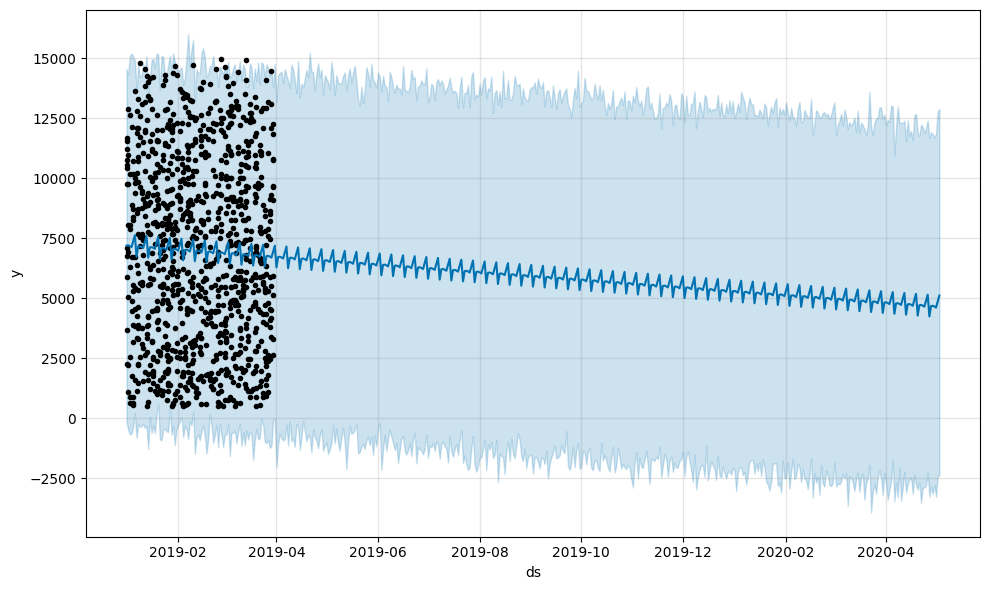

In [ ]:
plot1 = m.plot(forecast)